# **Librerias**

In [1]:
!pip install emoji #instalar librería para los emojis
!pip install spacy==2.3.1
!python -m spacy download es_core_news_lg #instalar la librería de spacy (español, mediana)
import spacy #libreria para feature vector
import es_core_news_lg #librería de spacy
import pandas as pd #libreria pandas para leer los datos en formato .csv
import re #libreria para manejo de texto
import matplotlib.pyplot as plt #libreria para graficar
from IPython.display import display_html #para mostrar 2 tablas de pandas una al lado de otra
from keras.preprocessing.text import Tokenizer #libreria para Tokenizar el texto
from keras.preprocessing.sequence import pad_sequences #libreria para padding
from sklearn.model_selection import train_test_split #libreria para serparar los datos en entrenamiento y validacion
from sklearn.utils import shuffle #libreria para mezclar datos aleatoriamente
import numpy as np # libreria para tener una representacion en arreglos de numeros de los datos
from gensim.models.keyedvectors import KeyedVectors #libreria para descaragar embeddings pre entrenados
from emoji import UNICODE_EMOJI #libreria de emjois con una lista de emojis
#librerias para definir y entrenar el modelo
import tensorflow as tf #tensorflow
from tensorflow import keras #keras
from tensorflow.keras import layers #layers
from keras import backend as K #backend de keras
try: #importar libreria y hacer conexion con google drive
  from google.colab import drive #libreria que permite leer los datos de google drive
  drive.mount('/content/gdrive')
except:
  None

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=f53a3f4f63e5bb64e948c8062a39423e41766d24a557e6b75524ff222cb372c6
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji
     |████████████████████████████████| 9.9MB 5.7MB/s 
     |████████████████████████████████| 2.1MB 46.1MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 573.1MB 1.2MB/s 
  Created wheel for es-core-news-lg: filename=es_core_news_lg-2.3.1-cp36-none-any.whl size=573139081 sha256=11c0315f51943881411eceb8d0ee9eced49ea69c2576f6d55056533037a0c7fc
  Stored in directory: /tmp/pip-ephem-wheel-cache-x8rkxbms/wheels/48/59/33/558e7f48e924c6cac

# **Datos**

In [2]:
DIR_DATOS_TRAIN='/content/gdrive/My Drive/aichallenge2020/training.csv' #direccion en google drive donde estan los datos de entrenamiento
DIR_DATOS_TEST='/content/gdrive/My Drive/aichallenge2020/test.csv' #direccion en google drive donde estan los datos de validacion
try:
  datos_train = pd.read_csv(DIR_DATOS_TRAIN) #la libreria pandas lee los datos de entrenamiento y los asigna a la variable datos_train
  datos_test = pd.read_csv(DIR_DATOS_TEST) #la libreria pandas lee los datos de validacion y los asigna a la variable datos_test
except: #leer los datos local y no de google drive
  try:
    datos_train = pd.read_csv('training.csv') 
    datos_test = pd.read_csv('test.csv') 
  except:
    datos_train = pd.read_csv('../input/aichallenge2020/training.csv')
    datos_test = pd.read_csv('../input/aichallenge2020/test.csv')


pd.set_option('display.max_colwidth', -1) #para mostrar cada tweet completo
datos_train # mostrar los tweets de entrenamiento

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


,is_organico,tweet
0,1,#USAgent protagonizará su propia serie en Marvel (@Marvel) https://t.co/UW0Edo6WO5
1,0,PISCES: la Luna nueva en Leo es la apertura cósmica para que ustedes aclaren y se comprometan con metas para el primer trimestre de 2021. Es hora de iniciar pequeños cambios que harán una gran diferencia https://t.co/m11Kuuy49D
2,1,"""Ya está en cancha el último grupo de la R4 del #spgcchampionship confirmado por Nicolás Echavarría (-15), Augusto Núñez (-13) y Michael MCGowan (-13). #BupaChallenge"""
3,0,"""#CERVEZAS # ESPAÑA 'El Sainete' o cómo combinar hasta 50 tipos diferentes de cerveza sin salir de casa https://t.co/hvcu3q4Lcer El restaurante Madrid ofrece esta posibilidad en su nuevo servicio 'entrega' Entre las variedades disponibles: trigo, 'belgian ale', abadía..."""
4,1,El MSPAS te trae: ¡Los Chapines en Cuarentena! 🇬🇹 Mira aquí el calendario semanal de todas las secciones que tenemos para ti y tu familia: 👇🏻 #EnCasaCombatimosElVirus #SomosResponsables
...,...,...
25707,1,"""Esta tarde de viernes 2, @TGWdigital conversaremos con el saxofonista Javier García, que se presenta el sábado 10 de noviembre, Teatro del IGA, en el One night only, Jazz Live Show con un buen puñado de músicos chapines."""
25708,0,"""No sabemos quiénes son estas personas o lo que hacen. Pueden ser de Greenpeace, pueden ser de Greenpeace o de otra fuente""."
25709,1,"""🍰¡Hoy es el #DiaInternacionaldelCheeseCake!🍰 Existen diferentes #recetas y se terminan con 🍒cerezas, frambuesas, 🍓fresas, dulce de leche... ¿Cómo sueles prepararlo? 😋 https://t.co/R4jLZcP9i8"""
25710,1,"""Desde ya le deseamos suerte a nuestro golfista Ted Kim, quien estará representando a Guatemala en los Juegos Mundiales de Olimpiadas Especiales 2019 #vamosguate #golf #guatemala https://t.co/2KrA2ZBd6A"""


# **Analisis de datos**

Proporcion de tweets organicos e inorganicos

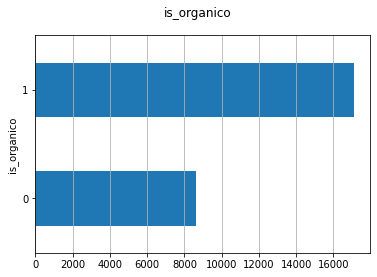

In [3]:
#graficar cantidad de tweets orgánicos e inorgánicos en el dataset
dtf = datos_train
x = "is_organico"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
#crear gráfica:
dtf[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
#mostrar gráfica:
plt.show()

Mostrar las palabras mas y menos usadas en los datos

In [4]:
def palabrasmasymenosusadas(dataframe,numero_de_palabras): #funcion para determinar las palabras mas y menos usadas de los datos
  try:
    top = pd.Series(' '.join(dataframe['tweet']).lower().split(),name='numero de usos').value_counts()[:numero_de_palabras].to_frame()  # numero_de_palabras palabras mas comunes (sin preprocesar)
    bottom = pd.Series(' '.join(dataframe['tweet']).lower().split(),name='numero de usos').value_counts()[-numero_de_palabras:].to_frame() # numero_de_palabras palabras menos comunes (sin preprocesar)
    top_ = top.style.set_table_attributes("style='display:inline'").set_caption(str(numero_de_palabras) + ' Palabras mas usadas')
    bottom_ = bottom.style.set_table_attributes("style='display:inline'").set_caption(str(numero_de_palabras) +' Palabras menos usadas')
  except:
    dataframe = pd.DataFrame(dataframe,columns=['tweet'])
    top = pd.Series(' '.join(dataframe['tweet']).lower().split(),name='numero de usos').value_counts()[:numero_de_palabras].to_frame()  # numero_de_palabras palabras mas comunes (sin preprocesar)
    bottom = pd.Series(' '.join(dataframe['tweet']).lower().split(),name='numero de usos').value_counts()[-numero_de_palabras:].to_frame() # numero_de_palabras palabras menos comunes (sin preprocesar)
    top_ = top.style.set_table_attributes("style='display:inline'").set_caption(str(numero_de_palabras) + ' Palabras mas usadas')
    bottom_ = bottom.style.set_table_attributes("style='display:inline'").set_caption(str(numero_de_palabras) +' Palabras menos usadas')

  
  return display_html(top_._repr_html_()+bottom_._repr_html_(), raw=True)  #mostar las tablas


print('Datos de entrenamiento tweets organicos')
print()
palabrasmasymenosusadas(pd.DataFrame.groupby(datos_train, 'is_organico').get_group(1),50) #ejecutar la funcion para ver las 50 palabras mas y menos usadas del set de entrenamiento (organicos)
print()
print('Datos de entrenamiento tweets inorganicos')
print()
palabrasmasymenosusadas(pd.DataFrame.groupby(datos_train, 'is_organico').get_group(0),50) #ejecutar la funcion para ver las 50 palabras mas y menos usadas del set de entrenamiento (inorganicos)
print()
print('total de palabras diferentes en el set: '+str(len(pd.Series(' '.join(datos_train['tweet']).lower().split(),name='numero de usos').value_counts())))
print()
print('Datos de validacion')
print()
palabrasmasymenosusadas(datos_test,50) #ejecutar la funcion para ver las 50 palabras mas y menos usadas del set de validacion 
print()
print('total de palabras diferentes en el set: '+str(len(pd.Series(' '.join(datos_test['tweet']).lower().split(),name='numero de usos').value_counts())))

Datos de entrenamiento tweets organicos



,numero de usos
de,18249
la,9440
en,8884
el,8233
y,7280
que,6415
a,5528
los,3377
un,3327
del,3235



Datos de entrenamiento tweets inorganicos



,numero de usos
de,12508
la,6731
en,6056
el,5883
que,5338
y,5311
a,3319
un,3091
es,2714
*,2557



total de palabras diferentes en el set: 91336

Datos de validacion



,numero de usos
de,13209
la,6894
en,6261
el,6163
y,5355
que,4953
a,3847
un,2747
es,2451
para,2433



total de palabras diferentes en el set: 51272


Mostrar los tweets falsos y reales mas largos

In [5]:
def maximo_palabras(dataframe): #funcion que encuentra el tweet falso y real mas largo/con mas palabras

  max_real = 0
  max_falso = 0
  max_real_carac = 0
  max_falso_carac = 0
  is_test = False #variable para saber si es el set de entrenamiento o validacion
  for tweet in dataframe.iloc:
    
    try:

      if len(tweet['tweet'].split()) > max_real and tweet['is_organico'] == 1: #Si se encuentra un tweet mas largo (en palabras) que el anterior que se tenia como mas largo y es real
        max_real = len(tweet['tweet'].split()) #nuevo maximo de palabras  de un tweet real
        tweet_max_real = tweet['tweet'] #nuevo tweet real mas largo
        id_real = tweet.name #posicion en los datos del tweet real mas largo

      
        
      elif len(tweet['tweet'].split()) > max_falso and tweet['is_organico'] == 0:  #Si se encuentra un tweet mas largo (en palabras)  que el anterior que se tenia como mas largo y es falso
        max_falso = len(tweet['tweet'].split()) #nuevo maximo de palabras  de un tweet falso
        tweet_max_falso = tweet['tweet'] #nuevo tweet falso mas largo
        id_falso = tweet.name #posicion en los datos del tweet falso mas 

      
      if len(tweet['tweet']) > max_real_carac and tweet['is_organico'] == 1: #Si se encuentra un tweet mas largo (en caracteres) que el anterior que se tenia como mas largo y es real
        max_real_carac = len(tweet['tweet']) #nuevo maximo de palabras  de un tweet real
        tweet_max_real_carac = tweet['tweet'] #nuevo tweet real mas largo
        id_real_carac = tweet.name #posicion en los datos del tweet real mas largo


      elif len(tweet['tweet']) > max_falso_carac and tweet['is_organico'] == 0:  #Si se encuentra un tweet mas largo (en caracteres)  que el anterior que se tenia como mas largo y es falso
        max_falso_carac = len(tweet['tweet']) #nuevo maximo de palabras  de un tweet falso
        tweet_max_falso_carac = tweet['tweet'] #nuevo tweet falso mas largo
        id_falso_carac = tweet.name #posicion en los datos del tweet falso mas 


    

    except KeyError: #es el set de validacion, y como no tiene columna is_organico el primer if generara un error
      is_test=True  #ya que surgio el error se sabe que es el set de validacion  
      if len(tweet['tweet'].split()) > max_real: #Si se encuentra un tweet mas largo (en palabras) que el anterior que se tenia como mas largo y es real
          max_real = len(tweet['tweet'].split()) #nuevo maximo de palabras  de un tweet real
          tweet_max_real = tweet['tweet'] #nuevo tweet real mas largo
          id_real = tweet.name #posicion en los datos del tweet real mas largo

      if len(tweet['tweet']) > max_real_carac: #Si se encuentra un tweet mas largo (en caracteres) que el anterior que se tenia como mas largo y es real
        max_real_carac = len(tweet['tweet']) #nuevo maximo de palabras  de un tweet real
        tweet_max_real_carac = tweet['tweet'] #nuevo tweet real mas largo
        id_real_carac = tweet.name #posicion en los datos del tweet real mas largo
      


  if is_test: 
    return max_real,tweet_max_real,id_real,max_real_carac,tweet_max_real_carac,id_real_carac #retornar variables sin distincion si los tweets son reales o no porque son del set de validacion
  else:
    return max_real,tweet_max_real,id_real,max_falso,tweet_max_falso,id_falso,max_real_carac,tweet_max_real_carac,id_real_carac,max_falso_carac,tweet_max_falso_carac,id_falso_carac #retornar variables con distincion si los tweets son reales o no porque son del set de entrenamiento



  

#corriendo la funcion para obtener las variables deseadas
max_real,tweet_max_real,id_real,max_falso,tweet_max_falso,id_falso,max_real_carac,tweet_max_real_carac,id_real_carac,max_falso_carac,tweet_max_falso_carac,id_falso_carac = maximo_palabras(datos_train)
#mostrando los resultados
print('Set de entrenamiento:')
print()
print('El tweet real mas largo en palabras ubicado en la posicion '+str(id_real)+' y con '+str(max_real)+' palabras es:')
print(tweet_max_real)
print()
print('El tweet real mas largo en caracteres ubicado en la posicion '+str(id_real_carac)+' y con '+str(max_real_carac)+' caracteres es:')
print(tweet_max_real_carac)
print()
print('El tweet falso mas largo en palabras ubicado en la posicion '+str(id_falso)+' y con '+str(max_falso)+' caracteres es:')
print(tweet_max_falso)
print()
print('El tweet falso mas largo en caracteres ubicado en la posicion '+str(id_falso_carac)+' y con '+str(max_falso_carac)+' palabras es:')
print(tweet_max_falso_carac)
print()
max_val,tweet_max_val,id_val,max_real_carac,tweet_max_real_carac,id_real_carac = maximo_palabras(datos_test)
print('Set de validacion:')
print()
print('El tweet mas largo en palabras ubicado en la posicion '+str(id_val)+' y con '+str(max_val)+' palabras es:')
print(tweet_max_val)
print()
print('El tweet mas largo en caracteres ubicado en la posicion '+str(id_real_carac)+' y con '+str(max_real_carac)+' palabras es:')
print(tweet_max_real_carac)
print()




Set de entrenamiento:

El tweet real mas largo en palabras ubicado en la posicion 3866 y con 60 palabras es:
"No es que me lo parezca. Es tan evidente como que hay un sol. El gol que le ha metido hoy Bartomeu a Messi es histórico. Otra cosa es que la gente que vive de Messi, por Messi y para Messi no lo vaya a reconocer jamás. Ya le has oído hoy en la entrevista: “he tomado nota de todo”"

El tweet real mas largo en caracteres ubicado en la posicion 14875 y con 306 caracteres es:
"¡Sorteazo! ¿Quieres un ejemplar de 'Dama Luna. La amenaza de Farside' de @iannmcdonald en @apachelibros?  1.- Síguenos a mí y a la editorial 2.- Da Me Gusta o Retuit (un punto cada) al contenido adjunto: 35 libros imprescindibles cf 3.- Comenta tu libro preferido, sugiere otro... https://t.co/xovUGJg3mZ"

El tweet falso mas largo en palabras ubicado en la posicion 9975 y con 510 caracteres es:
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# **Preprocesamiento**

Creando listas de los tweets para hacer el preprocesamiento mas facil

In [6]:
lista_de_tweets_train_crudo = datos_train.tweet.tolist() #pasar tweets  de entrenamiento a una lista (lista que no se preprocesara)
lista_de_tweets_test_crudo = datos_test.tweet.tolist() #pasar tweets  de validacion a una lista (lista que no se preprocesara)
#datos_train['tweet'] = datos_train['tweet'].str.lower() #volver todas las letras a minuscula en los datos de entrenamiento
#datos_test['tweet'] = datos_test['tweet'].str.lower() #volver todas las letras a minuscula en los datos de validacion
lista_de_tweets_train = datos_train['tweet'].tolist() #pasar tweets  de entrenamiento a una lista para manipularlos con mayor facilidad
lista_de_tweets_test =  datos_test['tweet'].tolist() #pasar tweets  de validacion a una lista para manipularlos con mayor facilidad

Feature Enginering 

In [28]:
nlp =es_core_news_lg.load() # funciones de spacy en español

def feature_enginering(lista_de_tweets):
  vector = []
  contador = 0
  for tweet in lista_de_tweets:
    #recorrer lista de tweets para contar las siguientes características:
    numero_de_caracteres = len(tweet)
    numero_de_palabras = len(tweet.split(' '))
    numero_de_palabras_mayus = 0
    comienzan_mayuscula = 0
    numero_de_letras = len(re.sub(r'[^\w]', '', tweet))
    numero_de_espacios = tweet.count(' ')
    numero_de_palabras_entre_caracteres = numero_de_palabras/numero_de_caracteres
    caracteres_entre_palabras = numero_de_caracteres/numero_de_palabras
    ADJ=0
    ADV=0
    AUX=0
    CCONJ=0
    DET=0
    INTJ=0
    NOUN=0
    NUM=0
    PART=0
    PRON=0
    PUNCT=0
    SCONJ=0
    SYM=0
    VERB=0
    alphacount = 0
    stopcount = 0
    cantoov = 0 
    canturl = 0
    countascci = 0
    countdigit = 0
    MISC = 0
    LOC = 0
    PER = 0
    ORG = 0
    vectores = 0
    punct = 0
    usuarios = 0
    emails = 0
    nums = 0
    quot = 0
    hashtag = 0
    hashtagc = 0
    hashtagd = 0
    


    doc = nlp(tweet) #aplicar nlp a la lista de tweets
    for token in doc:
      pos = token.pos_ #posicion
      alpha = token.is_alpha #alfanumerico
      stop =  token.is_stop #stopword
      ovv = token.is_oov #es una palabra desconocida
      url = token.like_url #es url
      ascii = token.is_ascii #es ASCII
      digit = token.is_digit #es dígito
      vectorr = token.has_vector #es una palabra con un word vector asociado 
      punctuation = token.is_punct #es puntuación
      email = token.like_email #es un email
      likenum = token.like_num # numeros
      quots = token.is_quote
      #iniciar conteo:
      if alpha:
        alphacount += 1
      if stop:
        stopcount += 1
      if ovv:
        cantoov += 1
      if url:
        canturl += 1
      if ascii:
        countascci += 1
      if digit:
        countdigit += 1
      if email:
        emails += 1
      if likenum:
        nums += 1
      if quots:
        quot +=1
      if token.ent_type_ != '':
        if token.ent_type_=='MISC':
          MISC += 1

        elif token.ent_type_=='ORG':
          ORG += 1

        elif token.ent_type_=='PER':
          PER += 1

        elif token.ent_type_=='LOC':
          LOC += 1
      if vectorr:
        vectores += 1
      if punctuation:
        punct += 1






      if pos == 'ADJ':
        ADJ += 1
      elif pos =='ADV':
        ADV += 1
      elif pos =='AUX':
        AUX += 1
      elif pos =='CCONJ': 
        CCONJ += 1
      elif pos =='DET':
        DET += 1
      elif pos =='INTJ':
        INTJ += 1
      elif pos =='NOUN':
        NOUN += 1
      elif pos =='NUM':
        NUM += 1
      elif pos =='PART':
        PART += 1
      elif pos =='PRON':
        PRON += 1
      elif pos =='PUNCT':
        PUNCT += 1
      elif pos =='SCONJ':
        SCONJ += 1
      elif pos =='SYM':
        SYM += 1
      elif pos =='VERB':
        VERB += 1

      try:
        if token.text.isupper():
          numero_de_palabras_mayus += 1
        elif not token.text.isupper() and token.text[0].isupper():
          comienzan_mayuscula += 1
      except:
        None
      
      if token.text.startswith('@') and len(token.text) > 1 :
          usuarios += 1

      
    for palabra in range(len(tweet.split(' '))): # se tiene que recorrer de esta manera para los features de los hashtags ya que spacy separa los # de las palabras y no nos sirve asi

      if tweet.split(' ')[palabra].startswith('#') and len(tweet.split(' ')[palabra]) > 1 :
        doc2 = nlp(tweet.split(' ')[palabra])
        hashtag += 1
        
        if doc2[1].has_vector:
          hashtagc += 1

        else:
          hashtagd += 1

       

    #unir valores en un vector
    vector.append([numero_de_caracteres,numero_de_palabras,numero_de_palabras_mayus,comienzan_mayuscula,numero_de_letras,numero_de_espacios,numero_de_palabras_entre_caracteres,
                   caracteres_entre_palabras,alphacount,stopcount,ADJ,ADV,AUX,DET,INTJ,NOUN,NUM,PRON,PUNCT,SCONJ,SYM,VERB,
                   cantoov,canturl,countascci,countdigit,MISC,LOC,PER,ORG,punctuation,vectores,usuarios,emails,nums,quot,hashtag,hashtagc,hashtagd])
  return vector

FE_train = feature_enginering(lista_de_tweets_train_crudo)
FE_test = feature_enginering(lista_de_tweets_test_crudo)

In [29]:
FE_train

[[82,
  9,
  0,
  2,
  65,
  8,
  0.10975609756097561,
  9.11111111111111,
  7,
  3,
  0,
  0,
  0,
  2,
  0,
  1,
  0,
  0,
  3,
  0,
  0,
  1,
  3,
  1,
  11,
  0,
  0,
  0,
  0,
  2,
  False,
  9,
  1,
  0,
  0,
  0,
  1,
  0,
  1],
 [227,
  37,
  1,
  3,
  184,
  36,
  0.16299559471365638,
  6.135135135135135,
  35,
  19,
  5,
  0,
  2,
  4,
  0,
  7,
  0,
  2,
  2,
  2,
  0,
  4,
  2,
  1,
  36,
  1,
  0,
  3,
  0,
  1,
  False,
  37,
  0,
  0,
  1,
  0,
  0,
  0,
  0],
 [167,
  25,
  1,
  8,
  128,
  24,
  0.1497005988023952,
  6.68,
  21,
  9,
  2,
  1,
  1,
  2,
  0,
  2,
  3,
  0,
  11,
  0,
  0,
  0,
  3,
  0,
  32,
  0,
  1,
  1,
  6,
  0,
  True,
  34,
  0,
  0,
  3,
  2,
  2,
  0,
  2],
 [272,
  38,
  2,
  5,
  214,
  37,
  0.13970588235294118,
  7.157894736842105,
  35,
  14,
  3,
  0,
  0,
  5,
  0,
  9,
  1,
  1,
  14,
  0,
  0,
  3,
  2,
  1,
  48,
  1,
  0,
  3,
  0,
  0,
  True,
  49,
  0,
  0,
  1,
  8,
  0,
  0,
  0],
 [185,
  28,
  1,
  7,
  148,
  27,
  0.1513513

Remplazando las direcciones url por una palabra en comun ('direccionweburl') y  a su vez se modificara cada usuario de twitter para cambiarlos por una palabra en comun ('usuariodetwitter)

In [8]:
def remplazar_urls(lista_de_tweets): #funcion que reemplaza las direcciones url por: direccionweburl
  webs = ('http','www.') #despues se puede expandir y experimentar para diferenciar si luego del http viene t.co o no
  comillas = ('"',"'")
  pagina_web = 'direccionweburl' #palabra que sustituira las direciones urls
  nueva_lista = [] #nueva lista de tweets con los urls sustituidos

  for tweet in lista_de_tweets: #iterar los tweets
    pagina = False #variable para saber si se encontraron urls en los tweets
    urls = [] #urls encontrados en el tweet

    

    for palabra in range(len(tweet.split(' '))): #iterar cada palabra


      if tweet.split(' ')[palabra].startswith(webs) and not tweet.split(' ')[palabra].endswith(comillas) : #si una palabra comienza por http o www. y que no termine en comillas (ya que varias terminan con comillas)
        pagina = True 
        urls.append(tweet.split(' ')[palabra]) #se agrega el url a los url encontrados en el tweet
          
      elif tweet.split(' ')[palabra].startswith(webs) and tweet.split(' ')[palabra].endswith(comillas):
         pagina = True 
         urls.append(tweet.split(' ')[palabra][:-1]) #se agrega el url (sin la comilla) a los url encontrados en el tweet

    

      
    
    tw = tweet
    if pagina: #si el tweet tenia urls
      

      for url in urls: 
        tw = tw.replace(url,pagina_web)
     

    nueva_lista.append(tw)


  return nueva_lista

lista_de_tweets_train = remplazar_urls(lista_de_tweets_train) #actualizando la lista de tweets de entrenamiento
lista_de_tweets_test = remplazar_urls(lista_de_tweets_test) #actualizando la lista de tweets de validacion




Separando los simbolos de las letras para que las palabras que tengan una coma,punto,comillas etc adheridas no sean consideradas por el modelo como palabras diferentes (este paso no se pudo realizar antes ya que las direcciones url cuentan con simbolos que si separan de las letras, la direccion deja de funcionar), a su vez se agruparan  los numeros usando una palabra en comun ('valornumerico')

Luego de varios experimentos notamos que no era conveniente agrupar los emojis ni los hashtag

La razon por la que no se modifican los # como se hace con los @ y urls, es porque estos a veces tienen una palabra que da contexto a la frase, como por ejemplo #musica o #arquitectura

In [9]:
def separar_simbolos_letras(lista_de_tweets): #funcion que separa simbolos de letras y sustituye valores especiales
  usuario_twitter = 'usuariodetwitter' #palabra que sustituira las direciones urls
  valor_numerico = 'valornumerico' #palabra que sustituira los numeros
  valor_emoji = 'valoremoji' # palabra que sustituira los emojis
  valor_has_conocido = '#palabraconocida' # palabras conocidas
  valor_has_desconocido = '#palabradesconocida' # palabras desconocidas
  nueva_lista = [] #nueva lista de tweets con los urls sustituidos

  for tweet in lista_de_tweets: #iterar los tweets
    tweet_separando_simbolos = ' '.join(re.findall(r"[A-Za-z@#áéíóúñÑÁÉÍÓÚ0123456789]+|\S", tweet)) #string con el tweet orginial pero separando los simbolos de las palabras, excepto el @, letras acentuadas y numeros
    usuarios_encontrados = False #variable para saber si se encontraron usuarios en los tweets
    usuarios = [] #usuarios encontrados en el tweet
    numeros_encontrados = False #variable para saber si se encontraron numeros en los tweets
    numeros = [] #numeros encontrados en el tweet
    emojis_encontrados = []
    se_enconraron_emojis = False
    has_con = False
    has_des = False
    has_con_l = []
    has_con_ll = []
    has_des_l = []
    has_des_ll = []

    for palabra in (tweet_separando_simbolos.split(' ')): #iterar cada palabra del nuevo tweet con los simbolos separados

        if palabra in UNICODE_EMOJI:
          se_enconraron_emojis = True
          emojis_encontrados.append(palabra)


        if palabra.startswith('@') and len(palabra) > 1 : #busca palabras que empiezen por arroba pero no sean solo el @, es decir usuarios de twiter
          usuarios_encontrados = True 
          usuarios.append(palabra) #se agrega el usuario a los usuarios encontrados en el tweet

        if palabra.startswith('#') and len(palabra) > 1 :
          doc = nlp(palabra)

          if doc[1].has_vector:
            has_con = True
            has_con_l.append(palabra)
            has_con_ll.append(doc[1].text)

          else:
            has_des = True
            has_des_l.append(palabra)
            has_des_ll.append(doc[1].text)


          
          

        elif palabra.isnumeric(): #si se encuentra un numero
          numeros_encontrados = True 
          numeros.append(palabra) #se agrega el numero a los usuarios encontrados en el tweet
          


    tw = tweet_separando_simbolos
    '''if usuarios_encontrados: #si el tweet tenia usuarios

      for usuario in usuarios: 
        tw = tw.replace(usuario,usuario_twitter) #remplaza los usuarios por la palabra en comun'''

    '''if se_enconraron_emojis:

      for emoji in emojis_encontrados:
        tw = tw.replace(emoji,valor_emoji) 
'''
    if has_con:

      for has in has_con_l:
        tw = tw.replace(has,str('## ')+str(nlp(has)[1].text))

    '''if has_des:

      for hasd in has_des_l:
        tw = tw.replace(hasd,str('## ')+str(valor_has_desconocido))'''



    if has_des:

      for hasd in has_des_l:
        tw = tw.replace(hasd,str('## ')+str(nlp(hasd)[1].text))

    if numeros_encontrados: #si el tweet tenia numeros
      nuevo_tw = []
      for palabra in tw.split(' '):
        for numero in numeros:
          if palabra == numero:
            palabra = valor_numerico
        nuevo_tw.append(palabra)
      tw = ' '.join(nuevo_tw)


    nueva_lista.append(tw)


  return nueva_lista

lista_de_tweets_train = separar_simbolos_letras(lista_de_tweets_train) #actualizando la lista de tweets de entrenamiento
lista_de_tweets_test = separar_simbolos_letras(lista_de_tweets_test) #actualizando la lista de tweets de validacion


Mostrando los primeros 100  tweets del set de entrenamiento luego de los cambios

In [10]:
lista_de_tweets_train[0:100]

['## USAgent protagonizará su propia serie en Marvel ( @Marvel ) direccionweburl',
 'PISCES : la Luna nueva en Leo es la apertura cósmica para que ustedes aclaren y se comprometan con metas para el primer trimestre de valornumerico . Es hora de iniciar pequeños cambios que harán una gran diferencia direccionweburl',
 '" Ya está en cancha el último grupo de la R4 del ## spgcchampionship confirmado por Nicolás Echavarría ( - valornumerico ) , Augusto Núñez ( - valornumerico ) y Michael MCGowan ( - valornumerico ) . ## BupaChallenge "',
 '" ## CERVEZAS # ESPAÑA \' El Sainete \' o cómo combinar hasta valornumerico tipos diferentes de cerveza sin salir de casa direccionweburl El restaurante Madrid ofrece esta posibilidad en su nuevo servicio \' entrega \' Entre las variedades disponibles : trigo , \' belgian ale \' , abadía . . . "',
 'El MSPAS te trae : ¡ Los Chapines en Cuarentena ! 🇬 🇹 Mira aquí el calendario semanal de todas las secciones que tenemos para ti y tu familia : 👇 🏻 ## EnCasa

Nuevas palabras mas y menos usadas

In [11]:
print('Datos de entrenamiento tweets organicos')
print()
palabrasmasymenosusadas(pd.DataFrame.groupby(pd.concat([datos_train['is_organico'], pd.DataFrame(lista_de_tweets_train,columns=['tweet']) ], axis=1),'is_organico').get_group(1),50) #ejecutar la funcion para ver las 50 palabras mas y menos usadas del set de entrenamiento (organicos)
print()
print('Datos de entrenamiento tweets inorganicos')
print()
palabrasmasymenosusadas(pd.DataFrame.groupby(pd.concat([datos_train['is_organico'], pd.DataFrame(lista_de_tweets_train,columns=['tweet']) ], axis=1),'is_organico').get_group(0),50) #ejecutar la funcion para ver las 50 palabras mas y menos usadas del set de entrenamiento (inorganicos)
print()
print('total de palabras diferentes en el set: '+str(len(pd.Series(' '.join(lista_de_tweets_train).split(),name='numero de usos').value_counts())))
print()
print('Datos de validacion')
print()
palabrasmasymenosusadas(pd.DataFrame(lista_de_tweets_test,columns=['tweet']),50) #ejecutar la funcion para ver las 50 palabras mas y menos usadas del set de validacion 
print()
print('total de palabras diferentes en el set: '+str(len(pd.Series(' '.join(lista_de_tweets_test).split(),name='numero de usos').value_counts())))


Datos de entrenamiento tweets organicos



,numero de usos
.,19461
de,18364
"""",17868
##,15323
",",12824
valornumerico,9934
la,9929
en,9171
el,8775
direccionweburl,7636



Datos de entrenamiento tweets inorganicos



,numero de usos
.,14224
de,12581
"""",12553
",",10868
##,8512
la,7145
el,6646
en,6252
y,5456
que,5431



total de palabras diferentes en el set: 54514

Datos de validacion



,numero de usos
.,14688
de,13282
"""",12855
",",10272
##,10152
la,7263
el,6695
en,6497
valornumerico,5939
y,5468



total de palabras diferentes en el set: 33900


Nuevos tweets mas largos

In [12]:

max_real,tweet_max_real,id_real,max_falso,tweet_max_falso,id_falso,max_real_carac,tweet_max_real_carac,id_real_carac,max_falso_carac,tweet_max_falso_carac,id_falso_carac = maximo_palabras(pd.concat([datos_train['is_organico'], pd.DataFrame(lista_de_tweets_train,columns=['tweet']) ], axis=1))
#mostrando los resultados
print('Set de entrenamiento:')
print()
print('El tweet real mas largo en palabras ubicado en la posicion '+str(id_real)+' y con '+str(max_real)+' palabras es:')
print(tweet_max_real)
print()
print('El tweet real mas largo en caracteres ubicado en la posicion '+str(id_real_carac)+' y con '+str(max_real_carac)+' caracteres es:')
print(tweet_max_real_carac)
print()
print('El tweet falso mas largo en palabras ubicado en la posicion '+str(id_falso)+' y con '+str(max_falso)+' caracteres es:')
print(tweet_max_falso)
print()
print('El tweet falso mas largo en caracteres ubicado en la posicion '+str(id_falso_carac)+' y con '+str(max_falso_carac)+' palabras es:')
print(tweet_max_falso_carac)
print()
max_val,tweet_max_val,id_val,max_real_carac,tweet_max_real_carac,id_real_carac = maximo_palabras(pd.DataFrame(lista_de_tweets_test,columns=['tweet']))
print('Set de validacion:')
print()
print('El tweet mas largo en palabras ubicado en la posicion '+str(id_val)+' y con '+str(max_val)+' palabras es:')
print(tweet_max_val)
print()
print('El tweet mas largo en caracteres ubicado en la posicion '+str(id_real_carac)+' y con '+str(max_real_carac)+' palabras es:')
print(tweet_max_real_carac)
print()


Set de entrenamiento:

El tweet real mas largo en palabras ubicado en la posicion 12139 y con 115 palabras es:
Acabo de hacer una simulación del sorteo de la Copa del Mundo y esto es lo que me ha salido . . . valornumerico ️ ⃣ 🇷 🇺 🏴 󠁧 󠁢 󠁥 󠁮 󠁧 󠁿 🇹 🇳 🇦 🇺 valornumerico ️ ⃣ 🇫 🇷 🇺 🇾 🇩 🇰 🇰 🇷 valornumerico ️ ⃣ 🇵 🇹 🇨 🇴 🇸 🇳 🇷 🇸 ☠ ️ 🇧 🇷 🇪 🇸 🇸 🇪 🇳 🇬 valornumerico ️ ⃣ 🇩 🇪 🇵 🇪 🇮 🇸 🇯 🇵 valornumerico ️ ⃣ 🇧 🇪 🇨 🇭 🇨 🇷 🇸 🇦 valornumerico ️ ⃣ 🇦 🇷 🇲 🇽 🇮 🇷 🇲 🇦 valornumerico ️ ⃣ 🇵 🇱 🇭 🇷 🇪 🇬 🇵 🇦

El tweet real mas largo en caracteres ubicado en la posicion 3621 y con 746 caracteres es:
Goles + asistencias de Messi en las últimas valornumerico temporadas ( club y selección ) : valornumerico - valornumerico : valornumerico + valornumerico = valornumerico FCB ~ valornumerico + valornumerico ARG ~ valornumerico + valornumerico valornumerico - valornumerico : valornumerico + valornumerico = valornumerico FCB ~ valornumerico + valornumerico ARG ~ valornumerico + valornumerico valornumerico - valornumerico : valornu

Padding y tokenizando

In [30]:
totalpaldif = len(pd.Series(' '.join(lista_de_tweets_train).split(),name='numero de usos').value_counts())
max_palabras_dif = totalpaldif #numero de palabras diferentes luego de preprocesar
max_len_tweet = 115 #se toma el largo del tweet real mas largo luego de preprocesar como el maximo largo para todos los tweets


Tokens = Tokenizer(
    num_words = max_palabras_dif, #se puede experimentar reduciendo este numero
    split = " ",
    filters = '',
    lower = False,
    char_level=False,
    oov_token = '<UKN>' #token para las palabras fuera del rango de num_words
)
Tokens.fit_on_texts(lista_de_tweets_train) #creando el "vocabulario" de tokens
reverse_word_map = dict(map(reversed, Tokens.word_index.items())) #variable para luego volver la secuencia de token a texto
numero_de_tokens = len(Tokens.index_word)

def sequence_to_text(list_of_indices): #funcion para obtener el texto dada una secuencia de tokens
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

secuencias_de_entrenamiento = Tokens.texts_to_sequences(lista_de_tweets_train) #creando las secuencias de tokens
sequencias_de_validacion = Tokens.texts_to_sequences(lista_de_tweets_test)
secuencias_de_entrenamiento = pad_sequences(secuencias_de_entrenamiento, maxlen=max_len_tweet,padding='pre') #haciendo padding, #se puede experimentar modificando maxlen
sequencias_de_validacion = pad_sequences(sequencias_de_validacion, maxlen=max_len_tweet,padding='pre')

y_entrenamiento = datos_train['is_organico'].values.tolist() #resultados para entrenar el modelo

#pasandolo todo a numpy
secuencias_de_entrenamiento = np.array(secuencias_de_entrenamiento)
sequencias_de_validacion = np.array(sequencias_de_validacion)
y_entrenamiento = np.array(y_entrenamiento)

FE_train = np.array(FE_train)
FE_test = np.array(FE_test)

Misma secuencia expresanda en tokens y en palabras

In [14]:
secuencias_de_entrenamiento[3][-40:]

array([    9,  2418,   379,     3,   415,    71,   854,     3,    80,
          10,    27,  1440,   155,   948,    53,  2705,     7,    31,
          62,  1713,    65,   762,    65,  1531,    25,  3977,  2950,
          19,  9542,     6,    65, 25667, 17623,    65,     6, 25668,
           2,     2,     2,     4], dtype=int32)

In [15]:
sequence_to_text(secuencias_de_entrenamiento[3][-40:])

['valornumerico',
 'tipos',
 'diferentes',
 'de',
 'cerveza',
 'sin',
 'salir',
 'de',
 'casa',
 'direccionweburl',
 'El',
 'restaurante',
 'Madrid',
 'ofrece',
 'esta',
 'posibilidad',
 'en',
 'su',
 'nuevo',
 'servicio',
 "'",
 'entrega',
 "'",
 'Entre',
 'las',
 'variedades',
 'disponibles',
 ':',
 'trigo',
 ',',
 "'",
 'belgian',
 'ale',
 "'",
 ',',
 'abadía',
 '.',
 '.',
 '.',
 '"']

Descargando Embedding pre entrenado

In [16]:
#embeddings pre-entrenados, tomados de https://github.com/dccuchile/spanish-word-embeddings
!wget https://zenodo.org/record/3234051/files/embeddings-l-model.vec?download=1 #embedding de dim 300
#!wget https://zenodo.org/record/3234051/files/embeddings-m-model.vec?download=1  #embedding de dim 100

--2020-12-01 03:00:14--  https://zenodo.org/record/3234051/files/embeddings-l-model.vec?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3446609027 (3.2G) [application/octet-stream]
Saving to: ‘embeddings-l-model.vec?download=1’

embeddings-l-model. 100%[===================>]   3.21G  5.36MB/s    in 8m 7s   

2020-12-01 03:08:26 (6.74 MB/s) - ‘embeddings-l-model.vec?download=1’ saved [3446609027/3446609027]



Leyendo el Embedding

In [17]:
#cargar el embedding seleccionado
wordvectors_file_vec2 = 'embeddings-l-model.vec?download=1' 
cantidad2 = 1313423 
wordvectors2 = KeyedVectors.load_word2vec_format(wordvectors_file_vec2, limit=cantidad2)

Creando la matriz de embbeding a usar en el modelo

In [18]:
num_tokens = max_palabras_dif #numero de tokens
embedding_dim = 300 #dimension del embedding
wordvectors2.add(['direccionweburl','usuariodetwitter','valornumerico','<UKN>','#palabradesconocida','##'],np.random.uniform(-0.5,0.5,(6,embedding_dim))) #agregando palabras al embedding
hits = 0
misses = 0
pos = 0
faltan = []
embedding_matrix = np.random.uniform(-0.5,0.5,(num_tokens, embedding_dim))
for word in (Tokens.word_index):
    try:
      embedding_vector = wordvectors2.get_vector(str(word).lower())
      
      
      embedding_matrix[pos] = embedding_vector
      
      
      hits += 1
    except:
      misses += 1
      faltan.append(word)


    pos += 1
print("Converted %d words (%d misses)" % (hits, misses)) #conseguir las palabras convertidas y no convertidas


Converted 44658 words (9857 misses)


Upsampling de la clase con minoria de datos, los tweets inorganicos

In [31]:
def oversampling(secuencias_de_entrenamiento,FE_train,y_entrenamiento): #funcion para hacer oversampling
  new_secuencias_de_entrenamiento = []
  new_FE_train = []
  new_y_entrenamiento = []
  

  for i in range(y_entrenamiento.shape[0]):
    new_secuencias_de_entrenamiento.append(secuencias_de_entrenamiento[i])
    new_FE_train.append(FE_train[i])
    new_y_entrenamiento.append(y_entrenamiento[i])
    if y_entrenamiento[i] == 0: #si el tweet no es organico duplicarlo
      new_secuencias_de_entrenamiento.append(secuencias_de_entrenamiento[i])
      new_FE_train.append(FE_train[i])
      new_y_entrenamiento.append(y_entrenamiento[i])

      for k in range(5):
        new_secuencias_de_entrenamiento, new_FE_train, new_y_entrenamiento = shuffle(new_secuencias_de_entrenamiento, new_FE_train, new_y_entrenamiento, random_state=42) #mezclar el dataset aleatoriamente 5 veces

  #pasandolo a numpy
  new_secuencias_de_entrenamiento = np.array(new_secuencias_de_entrenamiento)
  new_FE_train = np.array(new_FE_train)
  new_y_entrenamiento = np.array(new_y_entrenamiento)

  return new_secuencias_de_entrenamiento,new_FE_train,new_y_entrenamiento #retornando los nuevos dataset


new_secuencias_de_entrenamiento,new_FE_train,new_y_entrenamiento = oversampling(secuencias_de_entrenamiento,FE_train,y_entrenamiento) #corriendo la funcion
  


Distribucion de clases luego de upsampling

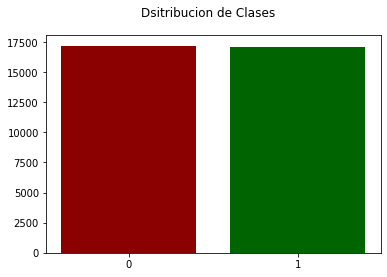

In [20]:
(unique, counts) = np.unique(new_y_entrenamiento, return_counts=True)
plt.bar(['0','1'], counts,color=['darkred','darkgreen'])
plt.suptitle('Dsitribucion de Clases')
plt.show()

Separando los datos en datos de entrenamiento y validacion

In [32]:
X_train, X_test,FE_tr,FE_te, y_train, y_test = train_test_split(new_secuencias_de_entrenamiento,
    new_FE_train,new_y_entrenamiento, test_size=0.2,shuffle = True, random_state = 42 )

#**Modelo y Entrenamiento**

Checkear uso de gpu

In [22]:
tf.config.experimental.list_physical_devices('GPU')

[]

Funciones para calcular el F1 Score

In [23]:
def get_f1(y_true, y_pred): #funcion que define los parametros del F1 score
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

Modelo y entrenamiento

In [ ]:
iii = layers.Input(shape=(max_len_tweet,)) #input con los tweets
ii = layers.Input(shape=(FE_tr.shape[1],)) #input con los features
embedding_layerr1 = layers.Embedding(num_tokens ,embedding_dim, input_length=max_len_tweet,embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=True,mask_zero=True) #embedding layer

emb1 = embedding_layerr1(iii)


LSTM = layers.Bidirectional(layers.LSTM(128, return_sequences=False))(emb1)

fe = layers.Dense(32,activation='relu')(ii)

concat = layers.concatenate([LSTM,fe])

final = layers.Dense(1, activation="sigmoid")(concat)


modelo = keras.Model(inputs=[iii,ii], outputs=final)
modelo.summary()
modelo.compile("adam", "binary_crossentropy", metrics=["accuracy",get_f1])
h = modelo.fit([X_train,FE_tr],y_train,epochs=2,batch_size = 32,validation_data=([X_test,FE_te],y_test))

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 115)]        0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 115, 300)     16354200    input_17[0][0]                   
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 39)]         0                                            
__________________________________________________________________________________________________
bidirectional_8 (Bidirectional) (None, 256)          439296      embedding_8[0][0]                
______________________________________________________________________________________

Guardando el modelo

In [ ]:
modelo.save('modelo.h5') #guardar el modelo como archivo .h5

Imagen del modelo

In [ ]:
dot_img_file = '/tmp/model.png'
keras.utils.plot_model(modelo, to_file=dot_img_file, show_shapes=True)

# **Prediccion del set de validacion a entregar**

In [ ]:
predicciones = modelo.predict([sequencias_de_validacion,FE_test]) #realizar predicciones

In [ ]:
predicciones = np.where(predicciones > 0.5, 1, 0) # si la prediccion es mayor a 0.5 colocar 1 si no 0
#creando dataframe con las predicciones
submission = pd.DataFrame(predicciones,columns=['Predicted'])
#creando columnas del dataframe:
submission['Id'] = np.arange(len(predicciones))
submission = submission[['Id','Predicted']]

In [ ]:
submission #ver el resultado de las predicciones

In [ ]:
submission.to_csv(r'submission.csv',index = False) #guardando resultados en formato CSV